In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# dataframe 'st' is created containing historical stock data for the period 2006-01-01 to 2018-01-01
st = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
st.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


'Open' is the price of the stock at the beginning of the trading day  (it need not be the closing price of the previous trading day)

'High' is the highest price of the stock on that trading day

'Low' is the lowest price of the stock on that trading day

'Close' is the price of the stock at closing time

'Volume' indicates how many stocks were traded

In [3]:
stocks = st['Name'].unique()
stocks

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [4]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
# Displaying rows with NaN values
null_data = st[st.isnull().any(axis=1)]
null_data

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [6]:
# Replacing NaN value with closing price in the corresponding column
st.Open = st.Open.combine_first(st.Close)
st.Low = st.Low.combine_first(st.Close)
st.High = st.High.combine_first(st.Close)
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93612 non-null float64
High      93612 non-null float64
Low       93612 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [7]:
st['Date'] = pd.to_datetime(st['Date'], format='%Y/%m/%d')
st['H-L'] = st['High'] - st['Low']
st['O-C'] = st['Open'] - st['Close']
st['AVG'] = (st['Open'] + st['Close'])/2
st['% change'] = (st['Close']-st['Open'])/st['Open']
st.head()

,Date,Open,High,Low,Close,Volume,Name,H-L,O-C,AVG,% change
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2.11,-1.35,78.435,0.017361
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,1.24,0.78,79.100,-0.009813
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,1.09,0.42,78.200,-0.005356
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,1.26,0.01,78.635,-0.000127
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,1.37,-0.52,78.760,0.006624


#### Creating individual dataframe for each company for the period 2006-01-01 to 2018-01-01

In [8]:
# Technology Companies
apple = st[st['Name'] == 'AAPL']
microsoft = st[st['Name'] == 'MSFT']
intel = st[st['Name'] == 'INTC']
ibm = st[st['Name'] == 'IBM']
google = st[st['Name'] == 'GOOGL']

# Banking and Financial Services Companies
amex = st[st['Name'] == 'AXP']
jpmorgan = st[st['Name'] == 'JPM']

# Oil & Gas Companies
chevron = st[st['Name'] == 'CVX']
exxon = st[st['Name'] == 'XOM']

# Retail Companies
hdepot= st[st['Name'] == 'HD']
walmart = st[st['Name'] == 'WMT']

# Pharmaceutical Companies
johnson = st[st['Name'] == 'JNJ']
merck = st[st['Name'] == 'MRK']
pfizer = st[st['Name'] == 'PFE']

# Conglomerate Companies
mmm = st[st['Name'] == 'MMM']
unitedtech = st[st['Name'] == 'UTX']
general = st[st['Name'] == 'GE']

# Ecommerce company
amazon = st[st['Name'] == 'AMZN']

# Footwear manufacturing company
nike = st[st['Name'] == 'NKE']

In [9]:
# dataframe 'lst' is created containing all stock data for the period 2017-01-01 to 2018-01-01
lst = st[st['Date'] >= '2017-01-01']
lst.head()

,Date,Open,High,Low,Close,Volume,Name,H-L,O-C,AVG,% change
2769,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM,2.78,0.78,178.440,-0.004362
2770,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM,1.29,-0.29,178.175,0.001629
2771,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM,2.25,0.55,177.985,-0.003085
2772,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM,2.80,-0.94,177.760,0.005302
2773,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM,1.18,1.10,177.820,-0.006167


#### Creating individual dataframe for each company for the period 2017-01-01 to 2018-01-01

In [10]:
apple01 = lst[lst['Name'] == 'AAPL']
general01 = lst[lst['Name'] == 'GE']
microsoft01 = lst[lst['Name'] == 'MSFT']
intel01 = lst[lst['Name'] == 'INTC']
mmm01 = lst[lst['Name'] == 'MMM']
amex01 = lst[lst['Name'] == 'AXP']
chevron01 = lst[lst['Name'] == 'CVX']
exxon01 = lst[lst['Name'] == 'XOM']
ibm01 = lst[lst['Name'] == 'IBM']
hdepot01= lst[lst['Name'] == 'HD']
johnson01 = lst[lst['Name'] == 'JNJ']
jpmorgan01 = lst[lst['Name'] == 'JPM']
merck01 = lst[lst['Name'] == 'MRK']
pfizer01 = lst[lst['Name'] == 'PFE']
unitedtech01 = lst[lst['Name'] == 'UTX']
walmart01 = lst[lst['Name'] == 'WMT']
google01 = lst[lst['Name'] == 'GOOGL']
amazon01 = lst[lst['Name'] == 'AMZN']
nike01 = lst[lst['Name'] == 'AMZN']

### 1) Heatmap to visualize correlation between numeric attributes in 'st' dataframe

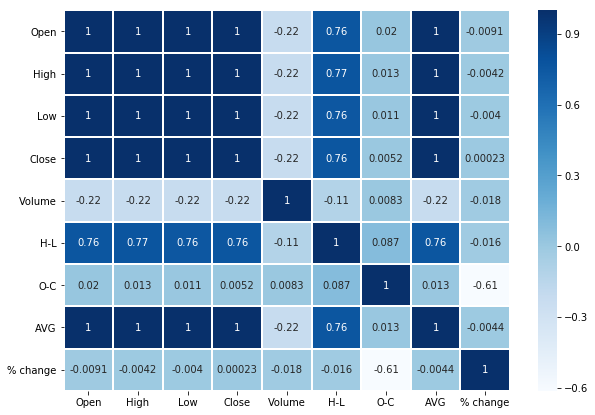

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(st.corr(),cmap = 'Blues',linecolor='white',linewidths=1,annot = True)

### 2) Barplot to show the traded volume of stocks for each company

In [12]:
# dataframe 'vol' is created containing volume of stocks traded by each company till 12/29/2017
vol = st.groupby('Name', as_index = False)['Volume'].sum()
vol = vol.sort_values('Volume',ascending = False)

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


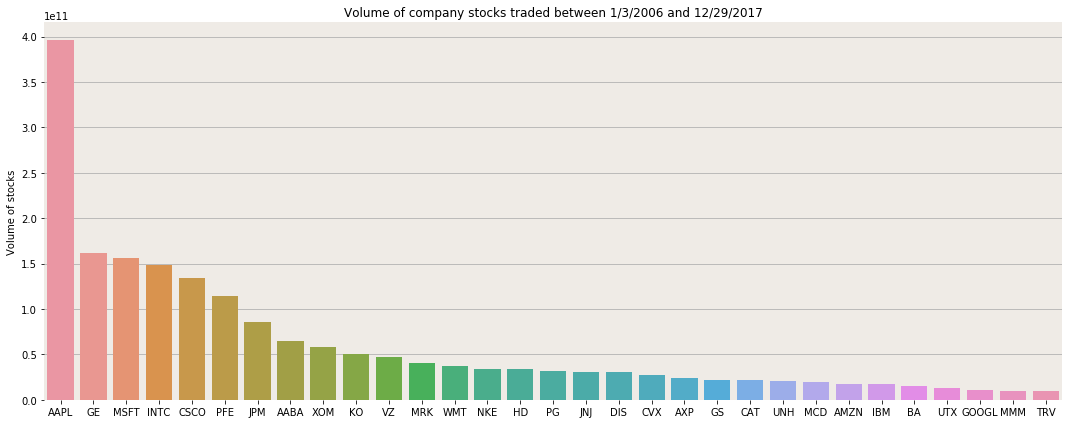

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.rc('axes',facecolor='#efebe6', edgecolor='none', axisbelow=True, grid=True)

sns.barplot(x = 'Name',y='Volume' ,data = vol)
ax.set_xlabel('')
ax.set_ylabel('Volume of stocks')
ax.set_title("Volume of company stocks traded between 1/3/2006 and 12/29/2017")

plt.tight_layout()
plt.show()

### 3)  Plot to compare the highest and lowest stock price achieved by each company

In [15]:
# Highest stock price reached by all the companies
h = st.sort_values('High', ascending = False).drop_duplicates('Name')
h.head()

,Date,Open,High,Low,Close,Volume,Name,H-L,O-C,AVG,% change
90569,2017-11-27,1202.66,1213.41,1191.15,1195.83,6744045,AMZN,22.26,6.83,1199.245,-0.005679
87565,2017-12-18,1076.45,1086.49,1070.37,1085.09,1514601,GOOGL,16.12,-8.64,1080.770,0.008026
12072,2017-12-20,298.70,299.33,297.11,297.90,2533689,BA,2.22,0.80,298.300,-0.002678
36233,2017-12-22,261.66,262.14,257.72,258.97,2100623,GS,4.42,2.69,260.315,-0.010281
3001,2017-12-04,243.05,244.23,238.51,239.26,2468747,MMM,5.72,3.79,241.155,-0.015593


In [16]:
# Lowest stock prices reached by all the companies
l = st.sort_values('Low', ascending = True).drop_duplicates('Name')
l.head()

,Date,Open,High,Low,Close,Volume,Name,H-L,O-C,AVG,% change
37065,2009-04-17,26.16,26.47,0.00,26.10,21671267,HD,26.47,0.06,26.130,-0.002294
70065,2008-06-06,49.71,49.71,0.01,47.25,3677163,TRV,49.70,2.46,48.480,-0.049487
30994,2009-03-04,7.24,7.25,5.73,6.69,752906054,GE,1.52,0.55,6.965,-0.075967
6173,2006-07-14,7.50,7.56,7.17,7.24,248258745,AAPL,0.39,0.26,7.370,-0.034667
91320,2008-11-20,9.10,10.01,8.94,8.95,37316961,AABA,1.07,0.15,9.025,-0.016484


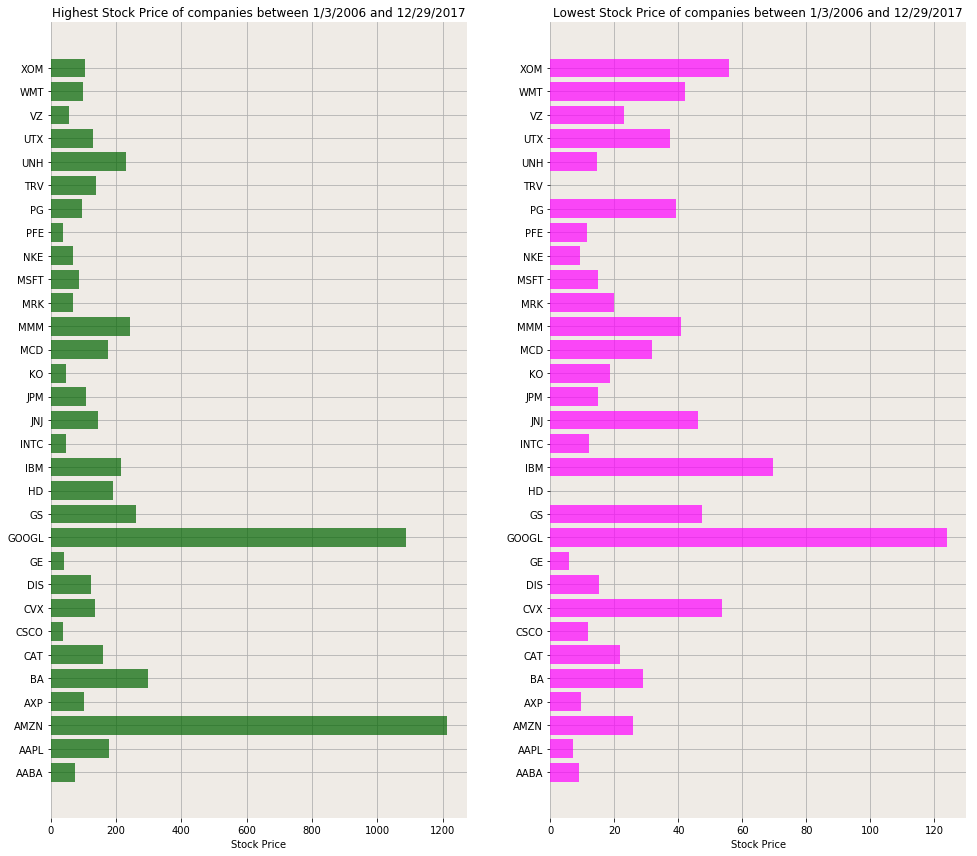

In [17]:
fig = plt.figure(figsize=(14, 12))
plt.rc('axes',facecolor='#efebe6', edgecolor='none', axisbelow=True, grid=True)

plt.subplot(1, 2, 1)
plt.barh(h['Name'], h['High'], align='center',color = 'darkgreen', alpha=0.7)
plt.xlabel('Stock Price')
plt.title('Highest Stock Price of companies between 1/3/2006 and 12/29/2017')

plt.subplot(1, 2, 2)
plt.barh(l['Name'], l['Low'], align='center',color = 'magenta', alpha=0.7)
plt.xlabel('Stock Price')
plt.title('Lowest Stock Price of companies between 1/3/2006 and 12/29/2017')

plt.tight_layout()
plt.show()

##### Highest stock price of Google and Amazon are way ahead than other comapnies close to 1150 units while rest of the companies prices stands below 300 units.
##### Google even has the highest stock price in the lowest stock price list with a price slightly above 120 units. 
##### On the other hand, companies like Travelers and Home Depot had their stock as low as zero.

### 4) Distribution of volume of stocks traded between 2006-01-01 to 2018-01-01

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


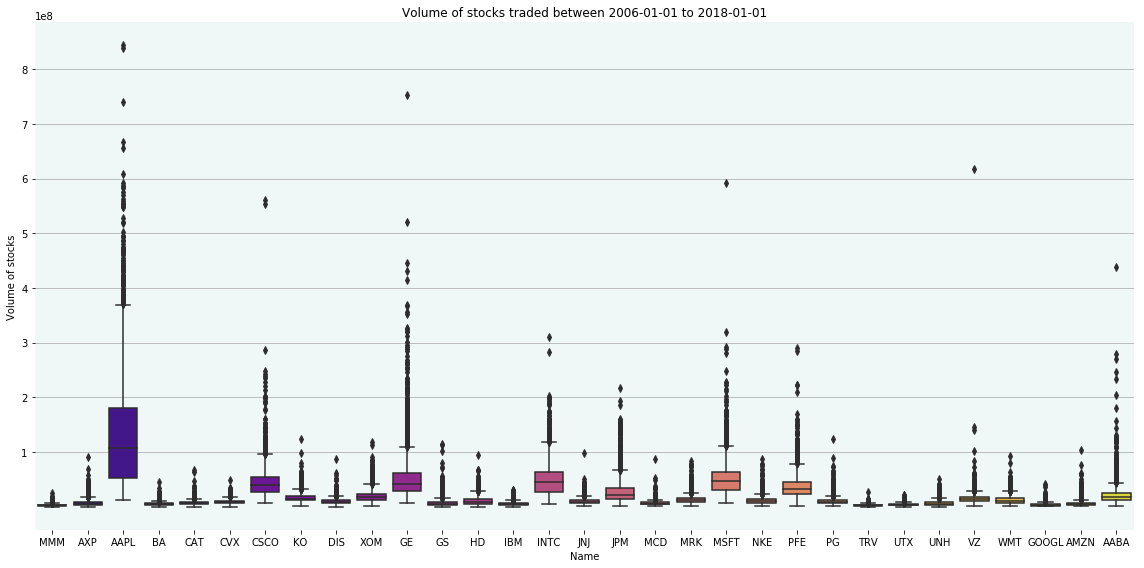

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x="Name", y="Volume", data=st,palette='plasma')
ax.set_ylabel('Volume of stocks')
ax.set_facecolor('#eff7f7')
yticks = [100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000]
ax.set_yticks(yticks)
ax.set_title("Volume of stocks traded between 2006-01-01 to 2018-01-01")

plt.tight_layout()
plt.show()

Here, Apple, Cisco, General Electric, Intel, JP Morgan, Microsoft and Pfizer are the companies having wide range of volume of stocks traded on any given day.

Companies like Google and Amazon are lesser in terms of volume;this can be due the fact that their stock prices are higher than other companies.

### 5) Trend of Average stock prices of all the companies between 1/3/2006 and 12/29/2017

In [19]:
from ggplot import *

C:\Users\Strea\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Strea\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Strea\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


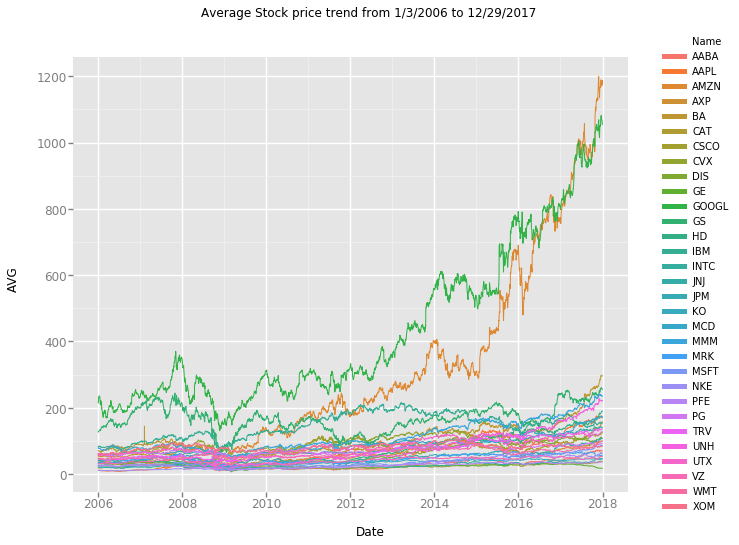

<ggplot: (133250805894)>

In [20]:
ggplot(aes(x='Date', y='AVG', colour='Name'), data=st) + geom_line() + \
    ggtitle('Average Stock price trend from 1/3/2006 to 12/29/2017 ')

#### From the above plots, we can see that stock prices of Google and Amazon have risen exponentially over the years
#### Lets take a look at their average stock price in 2017

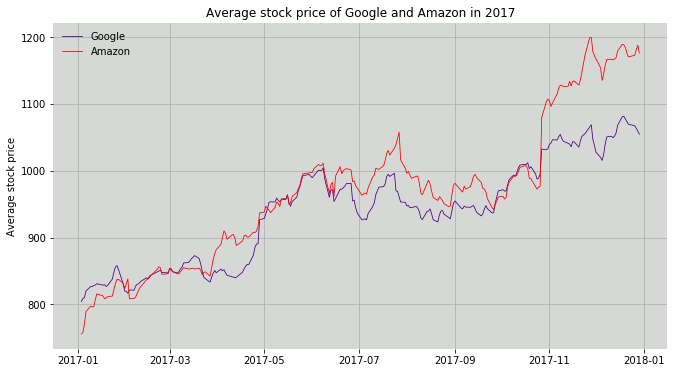

In [21]:
fig, ax = plt.subplots(figsize=(11, 6))
ax.set_title("Average stock price of Google and Amazon in 2017")
ax.set_ylabel('Average stock price')
ax.set_facecolor('#d6d8d6')

plt.plot(google01['Date'],google01['AVG'],color="indigo", linewidth=0.8)
plt.plot(amazon01['Date'],amazon01['AVG'],color="red", linewidth=0.8)
plt.legend(['Google', 'Amazon'], loc='upper left',frameon=False)

##### At the beginning of 2017, Google stock price was higher than Amazon stock price. 
##### While towards the end of 2017, Amazon stock price has surpassed the Google stock price by a good margin.

### 6) Volume of stocks traded by industry over the years from 2006-01-01 to 2018-01-01

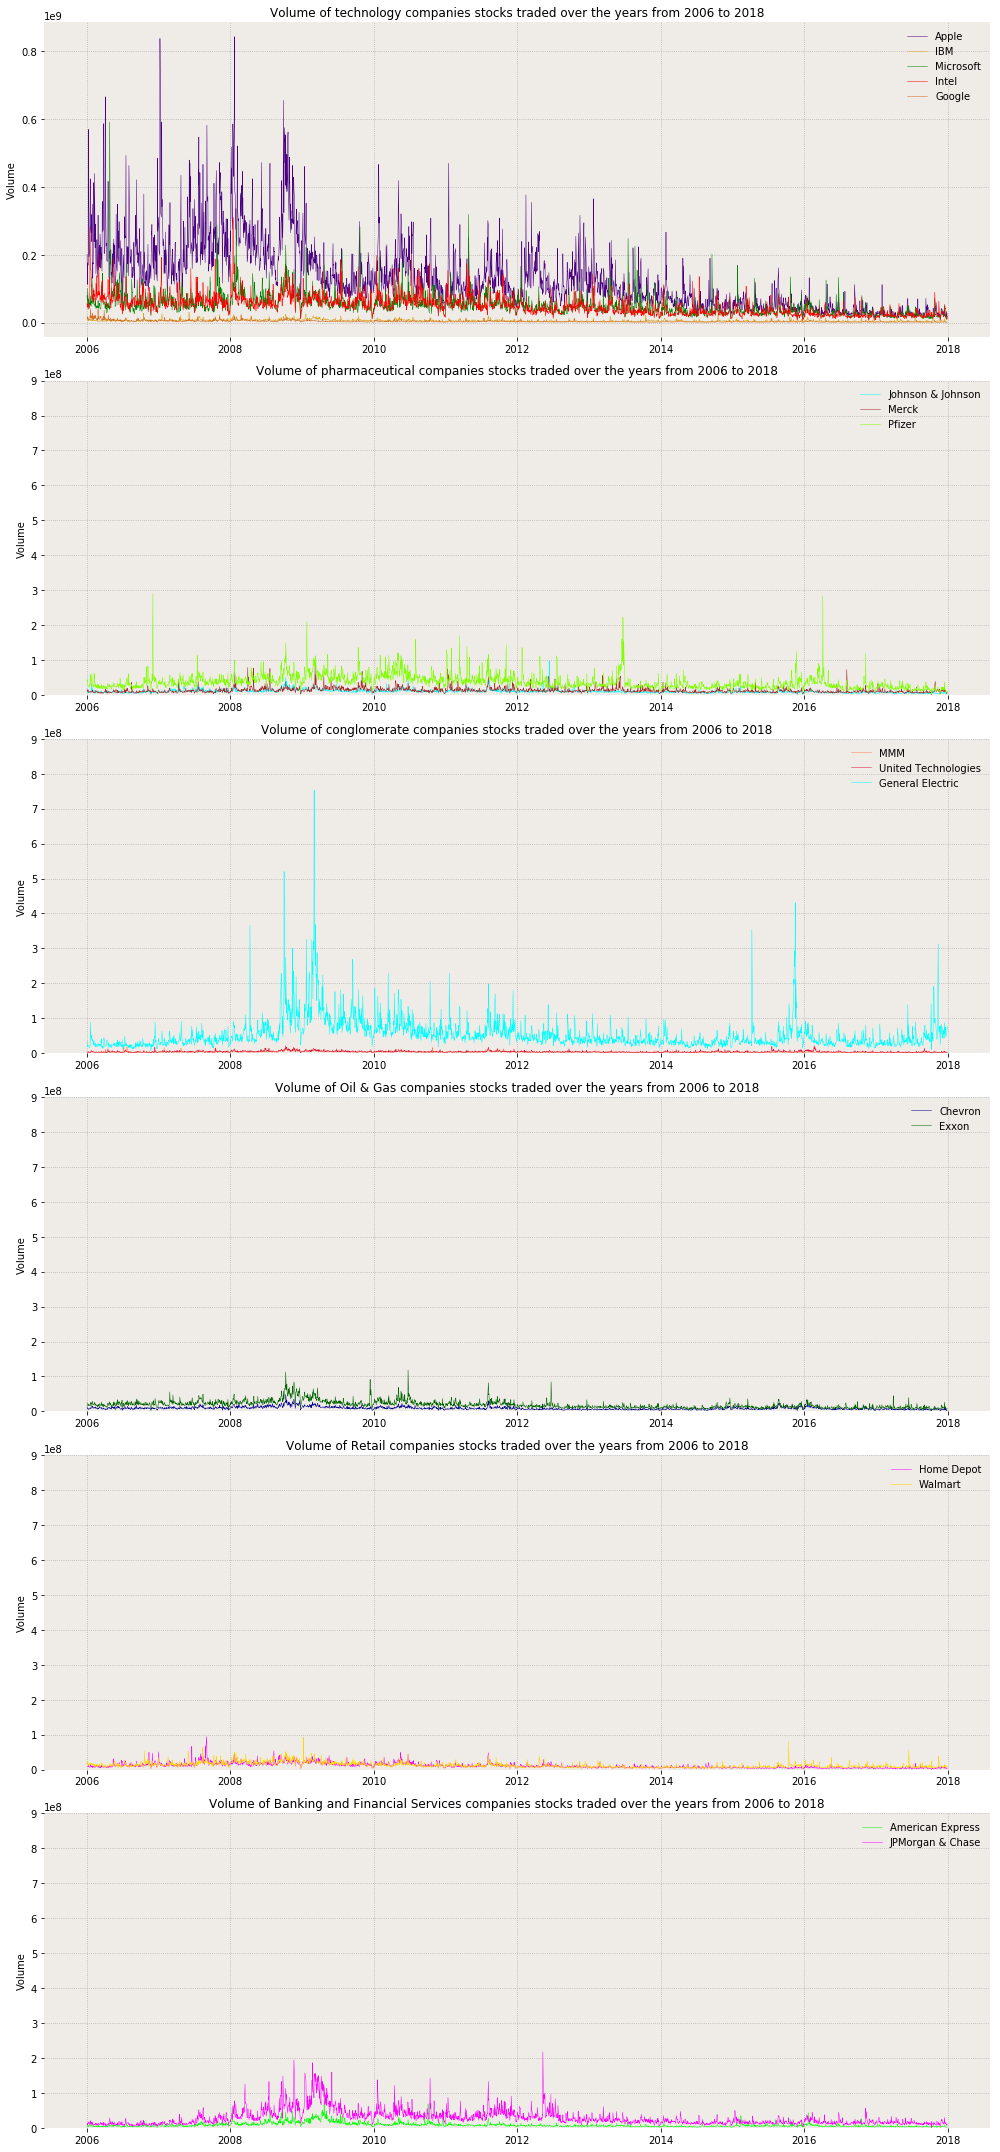

In [22]:
fig = plt.figure(figsize=(14, 30))

plt.subplot(6, 1, 1)
plt.title("Volume of technology companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.plot(apple['Date'],apple['Volume'],color="indigo", linewidth=0.5)
plt.plot(ibm['Date'],ibm['Volume'],color="goldenrod", linewidth=0.5)
plt.plot(microsoft['Date'],microsoft['Volume'],color="green", linewidth=0.5)
plt.plot(intel['Date'],intel['Volume'],color="red", linewidth=0.5)
plt.plot(google['Date'],google['Volume'], color ="chocolate" , linewidth=0.5)
plt.legend(['Apple', 'IBM', 'Microsoft', 'Intel', 'Google'], loc='upper right',frameon=False)

plt.subplot(6, 1, 2)
plt.title("Volume of pharmaceutical companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.ylim(0, 900000000)
plt.plot(johnson['Date'],johnson['Volume'],color="aqua", linewidth=0.5)
plt.plot(merck['Date'],merck['Volume'],color="brown", linewidth=0.5)
plt.plot(pfizer['Date'],pfizer['Volume'],color="chartreuse", linewidth=0.5)
plt.legend(['Johnson & Johnson', 'Merck', 'Pfizer'], loc='upper right',frameon=False)

plt.subplot(6, 1, 3)
plt.title("Volume of conglomerate companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.ylim(0, 900000000)
plt.plot(mmm['Date'],mmm['Volume'],color="coral", linewidth=0.5)
plt.plot(unitedtech['Date'],unitedtech['Volume'],color="crimson", linewidth=0.5)
plt.plot(general['Date'],general['Volume'],color="cyan", linewidth=0.5)
plt.legend(['MMM', 'United Technologies', 'General Electric'], loc='upper right',frameon=False)

plt.subplot(6, 1, 4)
plt.title("Volume of Oil & Gas companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.ylim(0, 900000000)
plt.plot(chevron['Date'],chevron['Volume'],color="darkblue", linewidth=0.5)
plt.plot(exxon['Date'],exxon['Volume'],color="darkgreen", linewidth=0.5)
plt.legend(['Chevron', 'Exxon'], loc='upper right',frameon=False)

plt.subplot(6, 1, 5)
plt.title("Volume of Retail companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.ylim(0, 900000000)
plt.plot(hdepot['Date'],hdepot['Volume'],color="fuchsia", linewidth=0.5)
plt.plot(walmart['Date'],walmart['Volume'],color="gold", linewidth=0.5)
plt.legend(['Home Depot', 'Walmart'], loc='upper right',frameon=False)

plt.subplot(6, 1, 6)
plt.title("Volume of Banking and Financial Services companies stocks traded over the years from 2006 to 2018")
plt.ylabel("Volume")
plt.grid(linestyle=":")
plt.ylim(0, 900000000)
plt.plot(amex['Date'],amex['Volume'],color="lime", linewidth=0.5)
plt.plot(jpmorgan['Date'],jpmorgan['Volume'],color="magenta", linewidth=0.5)
plt.legend(['American Express', 'JPMorgan & Chase'], loc='upper right',frameon=False)

plt.tight_layout()
plt.show()

##### We can see that technology companies as compared to other industries leads in terms of volume of stocks traded over the years.

### 7) 'Volume of stock traded' vs 'Average stock price' on daily basis from 01/01/2017 to 12/29/2017 (Technology Companies)

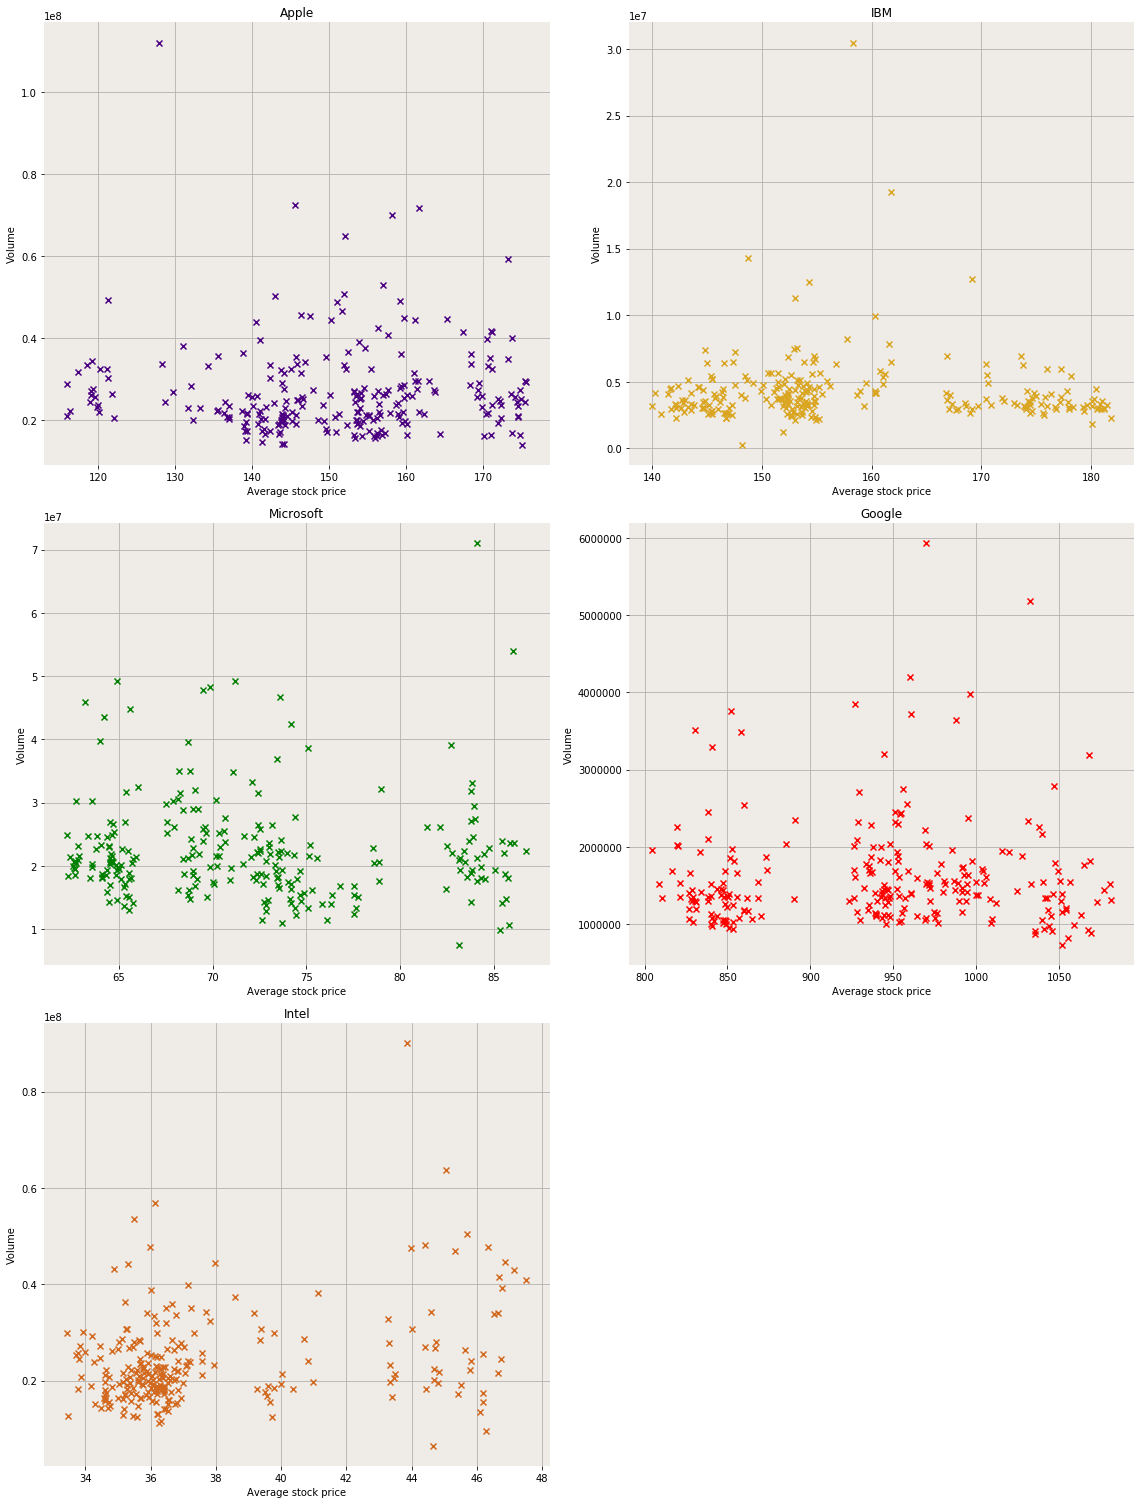

In [23]:
fig = plt.figure(figsize=(16, 21))

ax1 = plt.subplot(321)
plt.scatter('AVG','Volume',data=apple01, c = 'indigo', marker = 'x')
plt.title("Apple")
plt.xlabel("Average stock price")
plt.ylabel("Volume")

ax2 = plt.subplot(322)
plt.scatter('AVG','Volume',data=ibm01, c = 'goldenrod', marker = 'x')
plt.title("IBM")
plt.xlabel("Average stock price")
plt.ylabel("Volume")

ax3 = plt.subplot(323)
plt.scatter('AVG','Volume',data=microsoft01, c = 'green', marker = 'x')
plt.title("Microsoft")
plt.xlabel("Average stock price")
plt.ylabel("Volume")

ax4 = plt.subplot(324)
plt.scatter('AVG','Volume',data=google01, c = 'red', marker = 'x')
plt.title("Google")
plt.xlabel("Average stock price")
plt.ylabel("Volume")

ax5 = plt.subplot(325)
plt.scatter('AVG','Volume',data=intel01, c = 'chocolate', marker = 'x')
plt.title("Intel")
plt.xlabel("Average stock price")
plt.ylabel("Volume")

plt.tight_layout()
plt.show()

##### From above plots, we can say that,
For Apple, majority of the stocks were traded when average stock price was between 138 and 161 units(inclusive)

For IBM, majority of the stocks were traded when average stock price was between 142 and 156 units(inclusive)

For Microsoft, majority of the stocks were traded when average stock price ranged from 63 to 66 units, and 72 to 75 units (inclusive)

For Google, majority of the stocks were traded when average stock price ranged from 825 to 860 units, and 925 to 1010 units(inclusive)

For Intel, majority of the stocks were traded when average stock price was between 34.5 and 37 units(inclusive)

### 8) Fluctuation in stock prices on a daily basis across 6 different industries

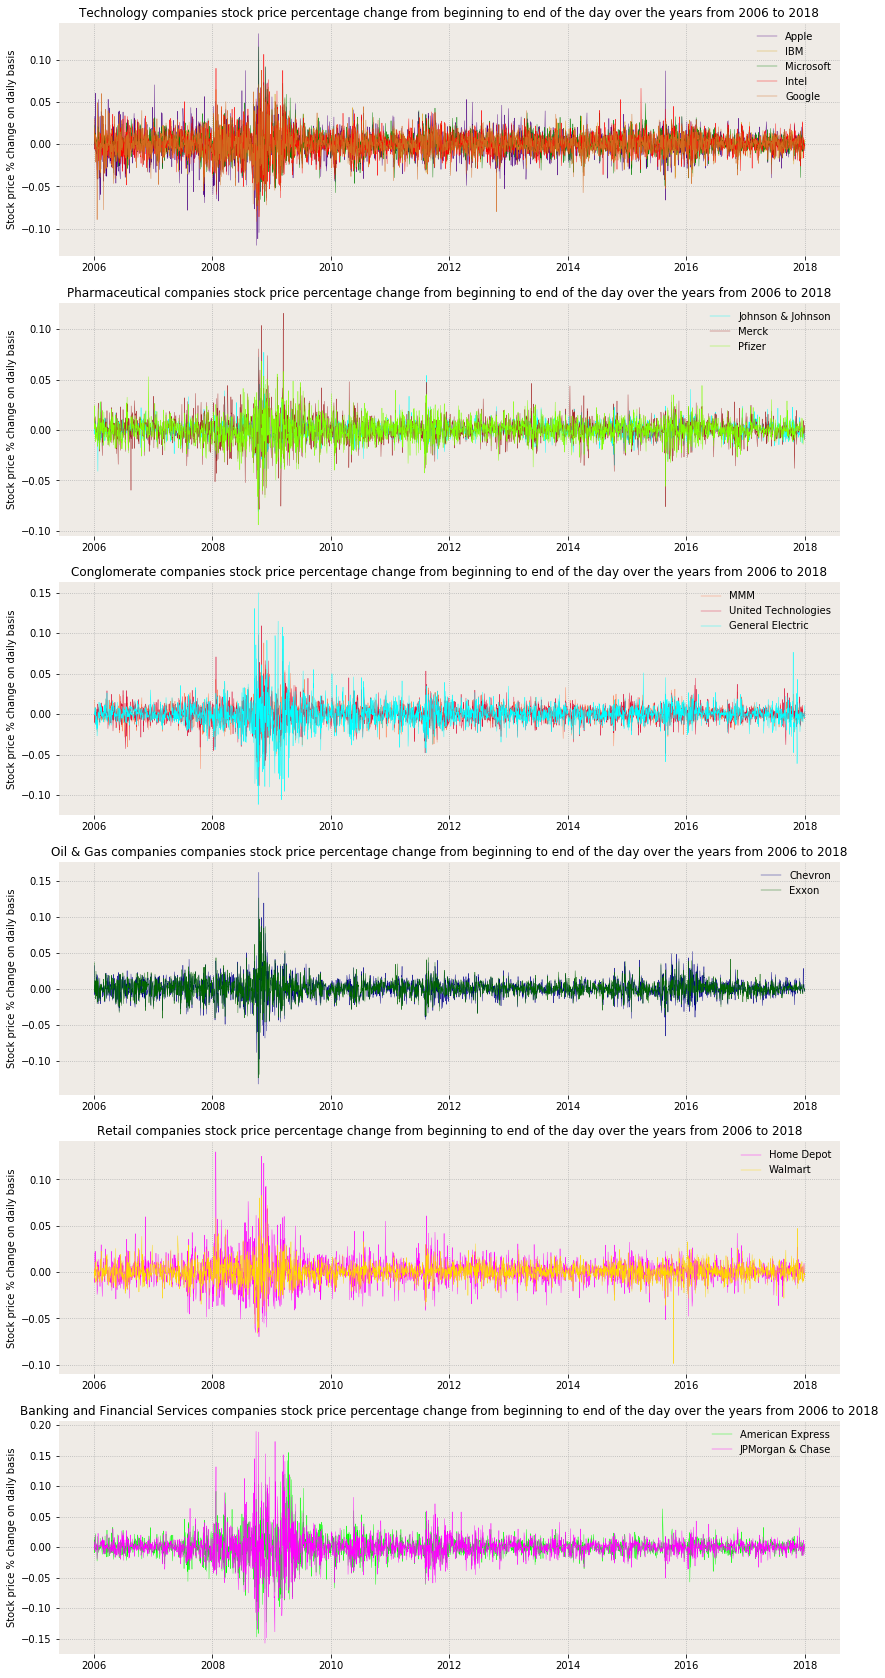

In [24]:
fig = plt.figure(figsize=(14, 30))

plt.subplot(6, 1, 1)
plt.title("Technology companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(apple['Date'],apple['% change'],color="indigo", linewidth=0.4)
plt.plot(ibm['Date'],ibm['% change'],color="goldenrod", linewidth=0.4)
plt.plot(microsoft['Date'],microsoft['% change'],color="green", linewidth=0.4)
plt.plot(intel['Date'],intel['% change'],color="red", linewidth=0.4)
plt.plot(google['Date'],google['% change'], color ="chocolate" , linewidth=0.4)
plt.legend(['Apple', 'IBM', 'Microsoft', 'Intel', 'Google'], loc='upper right',frameon=False)

plt.subplot(6, 1, 2)
plt.title("Pharmaceutical companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(johnson['Date'],johnson['% change'],color="aqua", linewidth=0.4)
plt.plot(merck['Date'],merck['% change'],color="brown", linewidth=0.4)
plt.plot(pfizer['Date'],pfizer['% change'],color="chartreuse", linewidth=0.4)
plt.legend(['Johnson & Johnson', 'Merck', 'Pfizer'], loc='upper right',frameon=False)

plt.subplot(6, 1, 3)
plt.title("Conglomerate companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(mmm['Date'],mmm['% change'],color="coral", linewidth=0.4)
plt.plot(unitedtech['Date'],unitedtech['% change'],color="crimson", linewidth=0.4)
plt.plot(general['Date'],general['% change'],color="cyan", linewidth=0.4)
plt.legend(['MMM', 'United Technologies', 'General Electric'], loc='upper right',frameon=False)

plt.subplot(6, 1, 4)
plt.title("Oil & Gas companies companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(chevron['Date'],chevron['% change'],color="darkblue", linewidth=0.4)
plt.plot(exxon['Date'],exxon['% change'],color="darkgreen", linewidth=0.4)
plt.legend(['Chevron', 'Exxon'], loc='upper right',frameon=False)

plt.subplot(6, 1, 5)
plt.title("Retail companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(hdepot['Date'],hdepot['% change'],color="fuchsia", linewidth=0.4)
plt.plot(walmart['Date'],walmart['% change'],color="gold", linewidth=0.4)
plt.legend(['Home Depot', 'Walmart'], loc='upper right',frameon=False)

plt.subplot(6, 1, 6)
plt.title("Banking and Financial Services companies stock price percentage change from beginning to end of the day over the years from 2006 to 2018")
plt.ylabel("Stock price % change on daily basis")
plt.grid(linestyle=":")
plt.plot(amex['Date'],amex['% change'],color="lime", linewidth=0.4)
plt.plot(jpmorgan['Date'],jpmorgan['% change'],color="magenta", linewidth=0.4)
plt.legend(['American Express', 'JPMorgan & Chase'], loc='upper right',frameon=False)

plt.show()
plt.tight_layout()

From the above plots, we can clearly see that the stock prices across all the companies had significant variation in and around the year 2009.

Banking and Financial companies had the most shifts in stock price with approximate change of 15%(+/-).

### 9) Plotting Moving Average Convergence Divergence(MACD) for the company WALT DISNEY in the year 2017

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of prices. The MACD is calculated by subtracting the 26-day exponential

In [25]:
walt01 = lst[lst['Name'] == 'DIS']
walt01.is_copy = False

In [26]:
walt01['26 ema'] = walt01['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
walt01['12 ema'] = walt01['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
walt01['MACD'] = (walt01['12 ema'] - walt01['26 ema'])
walt01['Signal'] = walt01['MACD'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()
walt01['Crossover'] = walt01['MACD'] - walt01['Signal']

In [27]:
import plotly 
import plotly.plotly as py
plotly.tools.set_credentials_file(username='Pratik09', api_key='mJiB4f1tQDwf7BbhadUk')
import plotly.graph_objs as go
import cufflinks as cf

In [28]:
macd = go.Scatter(
                x=walt01.Date,
                y=walt01['MACD'],
                name = "MACD",
                line = dict(color = '#A717CF'),
                opacity = 0.8)

signal = go.Scatter(
                x=walt01.Date,
                y=walt01['Signal'],
                name = "Signal",
                line = dict(color = '#176CCF'),
                opacity = 0.8)

crossover  = go.Scatter(
                x=walt01.Date,
                y=walt01['Crossover'],
                name = "Crossover",
                line = dict(color = '#CF9117'),
                opacity = 0.8)

data = [macd,signal,crossover]
layout = dict(
    title = "Moving Average Convergence Divergence(MACD) - Walt Disney",
    xaxis = dict(
        range = ['2017-01-01','2018-01-01'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Moving Average Convergence Divergence(MACD)")

### 10) Plotting bollinger bands for the company NIKE in the year 2017

#### Bollinger Bands are volatility bands placed above and below a moving average.

The purpose of Bollinger Bands is to provide a relative definition of high and low. By definition, prices are high at the upper band and low at the lower band. This definition can aid in rigorous pattern recognition and is useful in comparing price action to the action of indicators to arrive at systematic trading decisions

In [29]:
nike01.is_copy = False
nike01['20 ma'] = nike01['Close'].rolling(window=20,center=False).mean()
nike01['20 sd'] = nike01['Close'].rolling(window=20,center=False).std()
nike01['Upper Band'] = nike01['20 ma'] + (nike01['20 sd']*2)
nike01['Lower Band'] = nike01['20 ma'] - (nike01['20 sd']*2)

In [30]:
upper = go.Scatter(
                x=nike01.Date,
                y=nike01['Upper Band'],
                name = "Upper Band",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

lower = go.Scatter(
                x=nike01.Date,
                y=nike01['Lower Band'],
                name = "Lower Band",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

closing_price  = go.Scatter(
                x=nike01.Date,
                y=nike01['Close'],
                name = "Closing price",
                line = dict(color = '#CFC517'),
                opacity = 0.8)

ma = go.Scatter(
                x=nike01.Date,
                y=nike01['20 ma'],
                name = "20 Day Moving Average",
                line = dict(color = '#17SF2C'),
                opacity = 0.8)

data = [upper,lower,closing_price,ma]
layout = dict(
    title = "Bollinger Bands - Nike",
    xaxis = dict(
        range = ['2017-01-01','2018-01-01'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Bollinger Bands")

### 11) Distribution of volume of stocks traded between 2017-01-01 to 2018-01-01

Text(0.5,1,'Volume of stocks traded between 2017-01-01 to 2018-01-01')

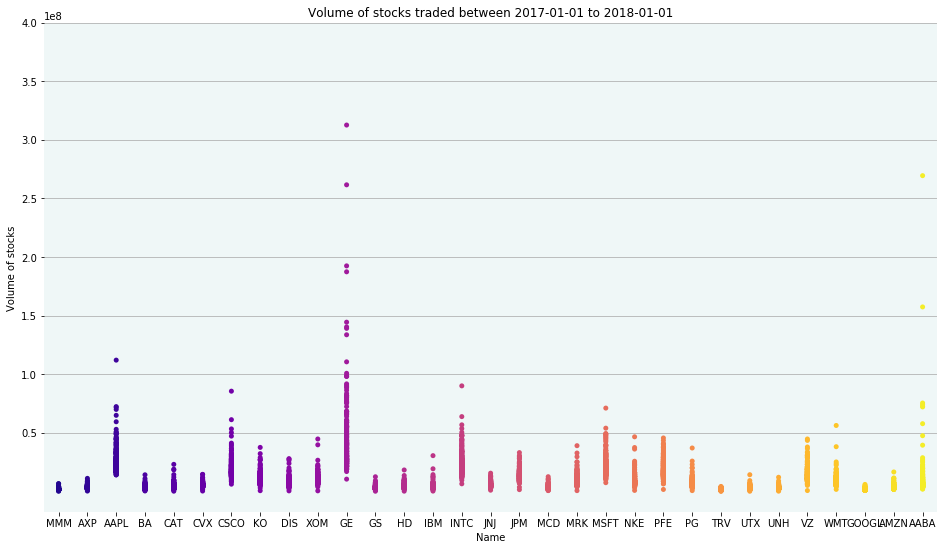

In [31]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.stripplot(x="Name", y="Volume", data=lst,palette='plasma')
ax.set_ylabel('Volume of stocks')
ax.set_facecolor('#eff7f7')
yticks = [50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000]
ax.set_yticks(yticks)
ax.set_title("Volume of stocks traded between 2017-01-01 to 2018-01-01")